# **K-Means Clustering In Python Uing Scikit -Learn**

d:\Users\abiha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


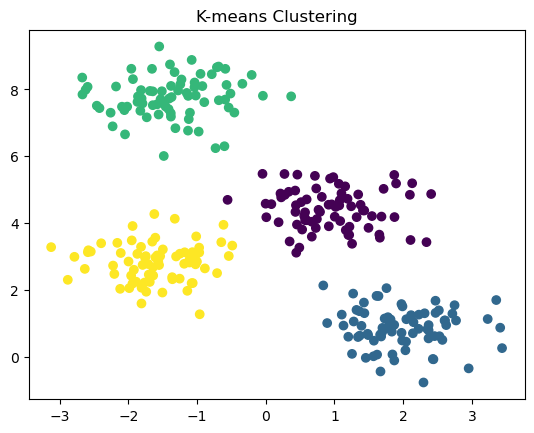

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


## Generating sample data 
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

## Initiate a K-means object with the number of clusters 

kmeans= KMeans(n_clusters=4)

## Fitting the data to the K-means algorithm 

kmeans.fit(X)

## Getting the predicted cluester labels 
labels= kmeans.labels_

## Plot the data point for different colours for different clusters 

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-means Clustering')
plt.show()


# **Lets Practice on Diamond Dataset** 

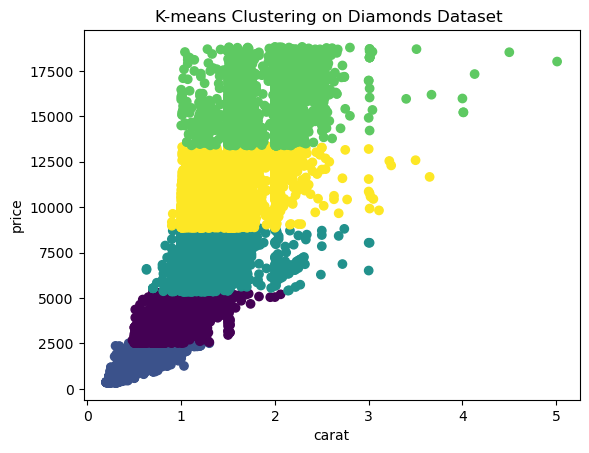

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = sns.load_dataset('diamonds')
x= df[['carat', 'price']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

## Getting the predicted cluster labels for each data points 
labels = kmeans.labels_


## Adds predicted clusters labels for each data points 

df['labels'] = labels

## Plotting the data points with different colour for different clusters 

plt.scatter(x['carat'], x['price'], c=labels)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('K-means Clustering on Diamonds Dataset ')
plt.show()



## K-means Inertia 

In [6]:
kmeans.inertia_  # Sum of squared distances to closest cluster center

9105328772.4714

## Make a Parallel Coordinate Plot using Plotly Express 


In [4]:
import plotly.express as px 
fig = px.parallel_coordinates(df, color='labels')
fig.show()

# **Model Evaluation** 

### 1- Elbow Method 


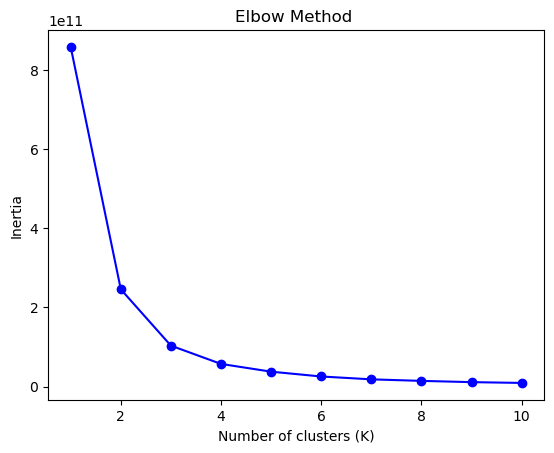

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


## Load the diamond dataset 
sns.load_dataset('diamonds')

## Selecting the relevant feaatures of clustering 

features=['carat', 'depth', 'price']

## Extract the selected features from the dataset 
X= df[features]

## Performing the K mean clustering from different values of K 

k_values= range(1, 11)   ## Test the K from 1 to 11 
inertias= []             ## List to store the inertia values 

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    inertias.append(kmeans.inertia_)


## Plot the Elbow curve 

plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel ('Inertia')
plt.title('Elbow Method ')
plt.show()



## Finding the elbow point 


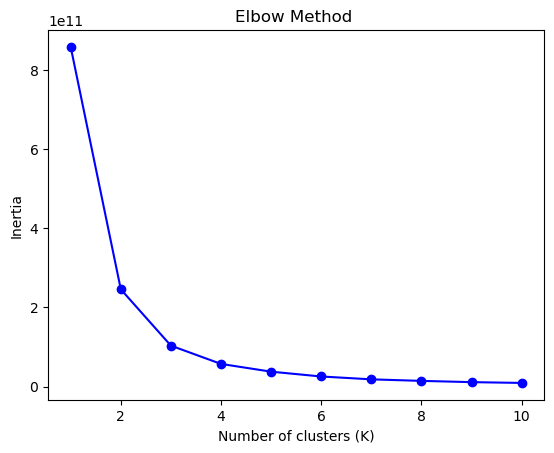

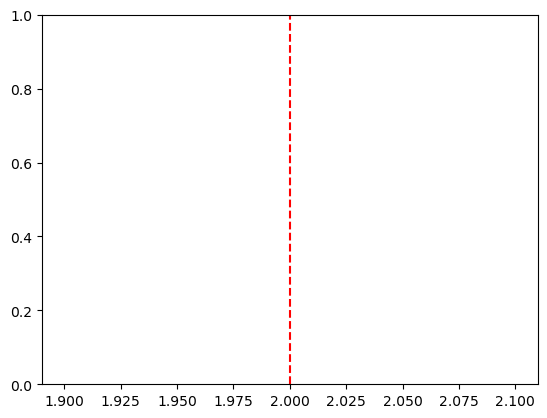

The best elbow point in the dataset is :  2


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


## Load the diamond dataset 
sns.load_dataset('diamonds')

## Selecting the relevant feaatures of clustering 

features=['carat', 'depth', 'price']

## Extract the selected features from the dataset 
X= df[features]

## Performing the K mean clustering from different values of K 

k_values= range(1, 11)   ## Test the K from 1 to 11 
inertias= []             ## List to store the inertia values 

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    inertias.append(kmeans.inertia_)


## Plot the Elbow curve 

plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel ('Inertia')
plt.title('Elbow Method ')
plt.show()

## Finding the elbow point
diff= [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k= diff.index(max(diff)) + 2


## Adding the vertical point to indicate the elboe points
plt.axvline(x=best_k, color='red', linestyle='--'  , label='Elboe Points')

plt.show()

print("The best elbow point in the dataset is : ",best_k)


# **Silouetee Methods**

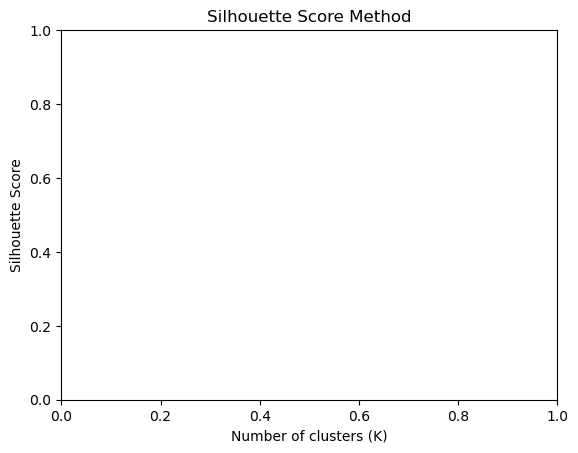

In [16]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score


## Load the diamond data set for the verification of the data more clearly 
df= sns.load_dataset('diamonds')

## Selcting the relevant features for the clusterring 
features= ['carat', 'depth', 'price']

## Extracting the selected feartures from the dataset 
X= df[features]

## Performning the K- means clustering for different values of K 
k_means = range(2, 10)  # Start from 2 to avoid k=1
silhouette_scores = []

for k in k_means:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    try:
        silhouette_scores.append(silhouette_score(X, labels))
    except ValueError as e:
        print(f"Skipping k={k} due to error: {e}")
    
## PLotting the silhouette score for different values of K

plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()



# **What is th K means ++**

### K means ++ is the model of K mean but advance version of the model. It stargically chooses the best model and minimize the calculations in the data to give more advance and less time consuming result of given data. Subsequent centriod are choosen based on the distances to previously selected centriods. It has higher proability of being choosen.

